# Tutorial: Information Imbalance

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from duly.plot import plot_inf_imb_plane
from duly.metric_comparisons import MetricComparisons

In [8]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 3D Gaussian with small variance along $z$

In [9]:
# define a simple dataset of a 3D gaussian with a small variance along the z axis

N = 1000

cov = np.identity(3)
cov[-1, -1] = 0.01**2
mean = np.zeros(3)
X = np.random.multivariate_normal(mean = mean, cov = cov, size = (N))



In [10]:
# define an instance of the MetricComparisons class

d = MetricComparisons(X)
d.compute_distances(maxk = X.shape[0])


In [11]:
labels = ['x', 'y', 'z']

coord_list = [[0,], [1,], [2,], [0,1], [0,2], [1, 2]]


In [12]:
# compute the information imbalances

imbalances = d.return_inf_imb_full_selected_coords(coord_list)


total number of computations is:  6
total number of computations is:  6


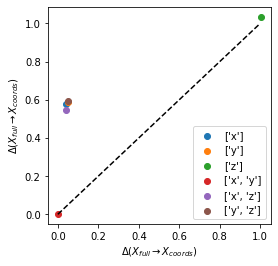

In [13]:
# plot information imbalance plane

plot_inf_imb_plane(imbalances, coord_list, labels)

### 10D isotropic Gaussian

In [14]:
N = 1000

X = np.random.normal(size = (N, 10))


In [15]:
# define an instance of the MetricComparisons class

d = MetricComparisons(X)

d.compute_distances(maxk = X.shape[0])


In [16]:
labels = ['x{}'.format(i) for i in range(10)]

coord_list = [np.arange(i) for i in range(1, 11)]

In [17]:
# compute the information imbalances

imbalances = d.return_inf_imb_full_selected_coords(coord_list)

total number of computations is:  10
total number of computations is:  10


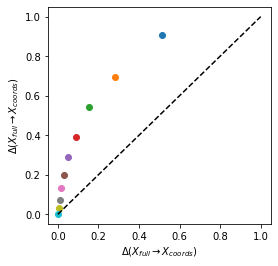

In [18]:
# plot information imbalance plane

plot_inf_imb_plane(imbalances)

### Sinusoidal function

In [19]:

N = 1000

x1 = np.linspace(0,1, N)
x1 = np.random.uniform(0, 1, N)
x1 = np.sort(x1)
x1 = np.atleast_2d(x1).T

x2 = 5*np.sin(x1*25)+np.random.normal(0, .5, (N, 1))

X = np.hstack([x1, x2])

Text(0, 0.5, '$x2$')

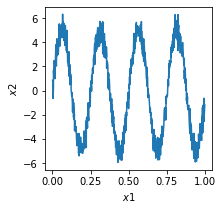

In [20]:
plt.figure(figsize = (3, 3))
plt.plot(x1, x2);
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')

In [21]:
# define an instance of the MetricComparisons class

d = MetricComparisons(X)
d.compute_distances(maxk = X.shape[0])


In [22]:
imb01, imb10 = d.return_inf_imb_two_selected_coords([0], [1])

In [23]:
imb01

0.20637

In [24]:
imb10

0.968048

Text(0, 0.5, '$\\Delta(x_2 \\rightarrow x_1) $')

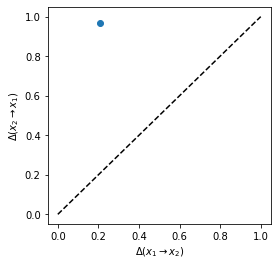

In [25]:
# plot information imbalance plane
plt.figure(figsize=(4, 4))

#plot_inf_imb_plane(imbalances, coord_list, labels)
plt.scatter(imb01, imb10)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel(r'$\Delta(x_1 \rightarrow x_2) $')
plt.ylabel(r'$\Delta(x_2 \rightarrow x_1) $')
    